In [1]:
import BondGraphTools as bgt

In [2]:
model=bgt.new(name='circuit_1')

In [3]:
# Parameters' values
C1_value=100*1e-6     #(100 uF)
C2_value=150*1e-6     #(150 uF)
R_value=100*1e3       #(100 k)

In [4]:
C1=bgt.new("C", value=C1_value)
C2=bgt.new("C", value=C2_value)
R=bgt.new("R", value=R_value)

In [5]:
zero_junc_1=bgt.new("0")
zero_junc_2=bgt.new("0")
one_junc=bgt.new("1")

In [6]:
bgt.add(model,C1,C2,R,zero_junc_1,zero_junc_2,one_junc)

In [7]:
bgt.connect(C1,zero_junc_1)
bgt.connect(zero_junc_1,one_junc)
bgt.connect(one_junc,R)
bgt.connect(one_junc,zero_junc_2)
bgt.connect(zero_junc_2,C2)

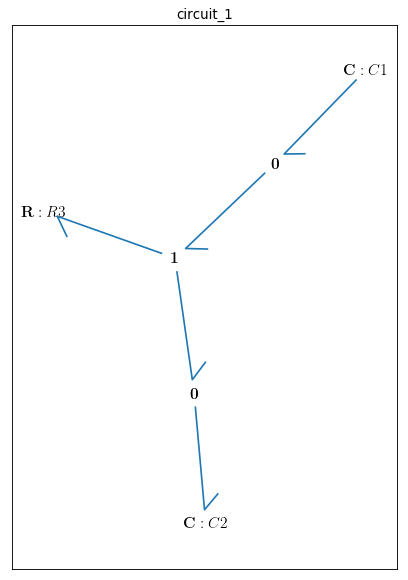

In [14]:
bgt.draw(model)

In [9]:
timespan=[0,50]

In [10]:
model.state_vars

{'x_0': (C: C1, 'q_0'), 'x_1': (C: C2, 'q_0')}

In [11]:
x0={"x_0":1, "x_1":0}

In [12]:
model.constitutive_relations

[dx_0 + x_0/10 - x_1/15, dx_1 - x_0/10 + x_1/15]

In [13]:
t, x = bgt.simulate(model, timespan=timespan, x0=x0)

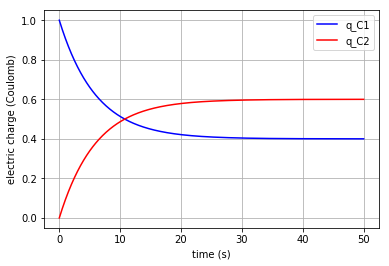

In [15]:
import matplotlib.pyplot as plt
plt.plot(t,x[:,0], '-b', label='q_C1')
plt.plot(t,x[:,1], '-r', label='q_C2')
plt.xlabel("time (s)")
plt.ylabel("electric charge (Coulomb)")
plt.legend(loc='upper right')
plt.grid()

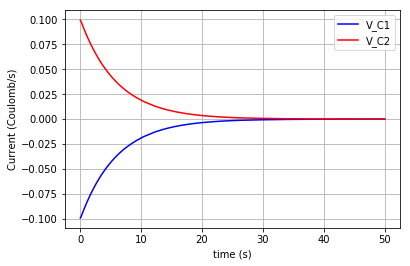

In [16]:
# dq_C1/dt = v_C1 (flow in C1)
import numpy as np
f = np.array(x[:,0], dtype=float)
slope=np.gradient(f,0.1)
v_C1=slope

# dq_C2/dt = v_C2 (flow in C2)
import numpy as np
f = np.array(x[:,1], dtype=float)
slope=np.gradient(f,0.1)
v_C2=slope

plt.plot(t,v_C1, '-b', label='v_C1')
plt.plot(t,v_C2, '-r', label='v_C2')
plt.xlabel("time (s)")
plt.ylabel("Flow (Coulomb/s)")
plt.legend(loc='upper right')
plt.grid()

In [23]:
u_R=R._params['r']*v_C2
u_C1=x[:,0]/C1._params['C']
u_C2=x[:,1]/C2._params['C']

Text(0,0.5,'Potential (J/Coulomb)')

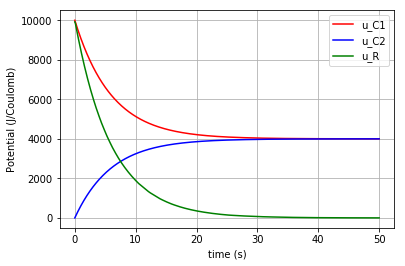

In [34]:
for u, c, label in [(u_C1,'-r','u_C1'), (u_C2,'-b','u_C2'), (u_R,'-g','u_R')]:
    fig=plt.plot(t,u,c,label=label)
    plt.legend(loc='upper right')
    
plt.grid()
plt.xlabel("time (s)")
plt.ylabel("Potential (J/Coulomb)")